# 夏秋雨 2024112200

## 用latex语法写一些公式
### QCD的拉氏量
\begin{align}
\mathcal{L}_{QCD} &= \sum_q \bar q (i \gamma^{\mu}D_{\mu} - m_q)q - \frac{1}{4}G^a_{\mu \nu} G^{a,\mu \nu},\  q=u,d,s,c,b,t, \ a=1, ..., 8
\end{align}
### 其中
\begin{align}
D_{\mu} &= \partial_{\mu} + i g_{s} G_{\mu}^a t^a, \ G^a_{\mu \nu} \equiv \partial_{\mu} G^a_{\nu} - \partial_{\nu} G^a_{\mu} - g_s f^{abc} G_{\mu}^b G_{\nu}^c
\end{align}

In [1]:
import numpy as np

a = np.array([range(1, 5)])
b = np.array([range(5, 1, -1)])
print(a, a.shape)
print(b, b.shape)

[[1 2 3 4]] (1, 4)
[[5 4 3 2]] (1, 4)


In [2]:
print(a + b)
print("-----")
print(a - b)
print("-----")
print(a * b)
print("-----")
print(a.T @ b)
print("-----")
print(a / b)

[[6 6 6 6]]
-----
[[-4 -2  0  2]]
-----
[[5 8 9 8]]
-----
[[ 5  4  3  2]
 [10  8  6  4]
 [15 12  9  6]
 [20 16 12  8]]
-----
[[0.2 0.5 1.  2. ]]


In [27]:
u, s, vh = np.linalg.svd(a.T * b)

In [28]:
u

array([[-1.82574186e-01,  9.50337189e-01,  2.52043435e-01,
        -6.56460545e-17],
       [-3.65148372e-01, -1.29407166e-01,  2.23428853e-01,
        -8.94427191e-01],
       [-5.47722558e-01,  1.14578156e-01, -8.28777320e-01,
        -2.85844766e-16],
       [-7.30296743e-01, -2.58814331e-01,  4.46857705e-01,
         4.47213595e-01]])

In [29]:
s

array([4.02492236e+01, 4.22576501e-15, 1.58773577e-16, 6.63440705e-33])

In [30]:
vh

array([[-6.80413817e-01, -5.44331054e-01, -4.08248290e-01,
        -2.72165527e-01],
       [ 7.25583004e-01, -4.30510074e-01, -4.91788216e-01,
        -2.15255037e-01],
       [-1.02792712e-01,  5.64238230e-01, -7.69075863e-01,
         2.82119115e-01],
       [-0.00000000e+00,  4.47213595e-01, -3.07419928e-16,
        -8.94427191e-01]])

In [3]:
import numpy as np

def calculate_eigenvalues(
        mat_a: np.ndarray,
        max_iter=1e6
) -> list:
    """
    计算一个矩阵的本征值，返回list，包含所有本征值
    参考householder变换：https://zh.wikipedia.org/zh-cn/QR%E5%88%86%E8%A7%A3
    算法流程：参考：https://blog.51cto.com/u_16213402/7221101
    :param max_iter: 最大迭代次数
    :param mat_a: 需要被计算的矩阵
    :return: list为包含所有本征矢的array，数据类型为np.ndarray
    """
    A = np.copy(mat_a)
    v = np.eye(A.shape[0])
    iter_times=0
    
    while iter_times < max_iter:
        e1 = np.zeros(A.shape[0]).reshape(A.shape[0], 1)
        e1[0] = 1
        e2 = np.zeros(A.shape[0] - 1).reshape(A.shape[0] - 1, 1)
        e2[0] = 1
        iter_times += 1
        alpha1 = A[:,0]
        alpha1 = alpha1.reshape(A.shape[0],1)
        a1 = np.linalg.norm(alpha1)
        omega1 = (alpha1 - a1 * e1) / np.linalg.norm(alpha1 - a1 * e1)
        H1 = np.eye(A.shape[0]) - 2 * omega1 * omega1.T.conjugate()
        h1_a = H1 @ mat_a
        beta = h1_a[1:,1].reshape(A.shape[0] - 1, 1)
        omega2 = (beta - np.linalg.norm(beta) * e2) / np.linalg.norm((beta - np.linalg.norm(beta) * e2))
        H2 = np.eye(A.shape[0] - 1) - 2 * omega2 * omega2.T.conjugate()
        zeros2 = np.zeros(A.shape[0] - 1).reshape(A.shape[0] - 1, 1)
        tmp = np.concatenate((zeros2, H2), 1)
        H2prime = np.concatenate((np.zeros(A.shape[0]).reshape(1, A.shape[0]), tmp), 0)
        H2prime[0][0] = 1
        R = H2prime @ (H1 @ A)
        Q = H1 @ H2prime
        new_A = R @ Q
        A = np.copy(new_A)
        
    return [A[i][i] for i in range(A.shape[0])]

In [4]:
mat_a = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
print(calculate_eigenvalues(mat_a))

[np.float64(5.999999999999998), np.float64(6.409875621687511e-17), np.float64(6.409875622668297e-17)]


显然householder变换不适合放在这里用于求QR值，迭代很慢并且收敛效果不好，不过数量级对上了至少代码没错

In [5]:
evalue, evec = np.linalg.eig(mat_a)
print(evalue)

[ 6.00000000e+00  4.03541664e-17 -2.96106259e-16]


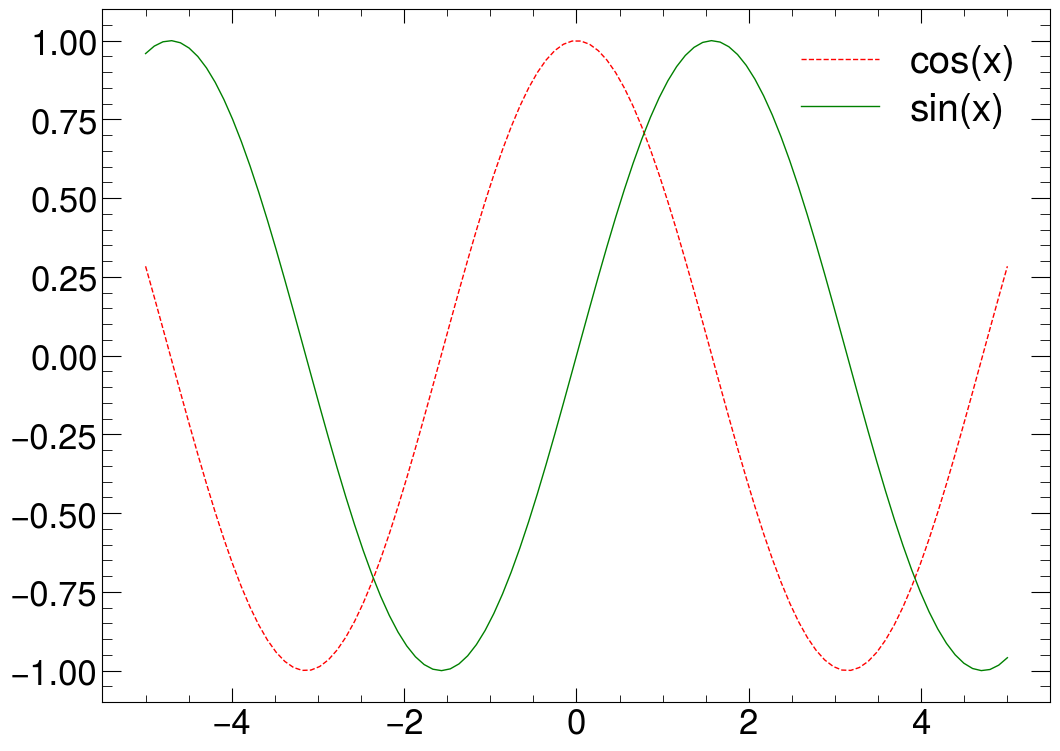

In [6]:
import matplotlib.pyplot as plt
import mplhep as hp
hp.style.use("ALICE")

x = np.linspace(-5, 5, 100)
plt.plot(x, np.cos(x), "r--", label="cos(x)")
plt.plot(x, np.sin(x), "g", label="sin(x)")
plt.legend(loc="best")

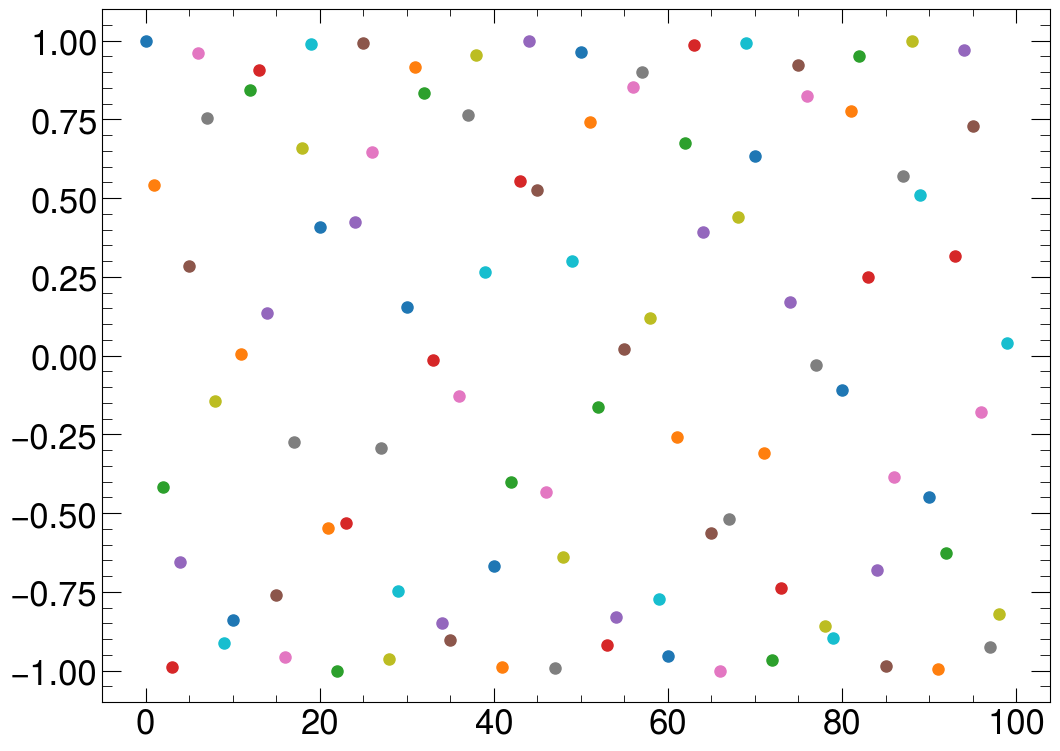

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hp
hp.style.use("ALICE")

with open("test1.csv", "w") as f:
    for i in range(100):
        f.write(str(i))
        f.write(",")
        f.write(str(np.cos(i)))
        f.write("\n")
        
with open("test1.csv", "r") as f:
    import re
    tmp = f.readline()
    while tmp != "":
        x = float(re.findall(r"([0-9]*),", tmp)[0])
        y = float(re.findall(r",(-?[0-9]*\.[0-9]*)", tmp)[0])
        plt.scatter(x, y)
        tmp = f.readline()
    plt.show()

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hp
hp.style.use("ALICE")

x = [i for i in range(100)]
y = [np.cos(i) for i in range(100)]

df = pd.DataFrame({"x": x, "y": y})
df.to_csv("test_pandas.csv")

In [9]:
new_df = pd.read_csv("test_pandas.csv")

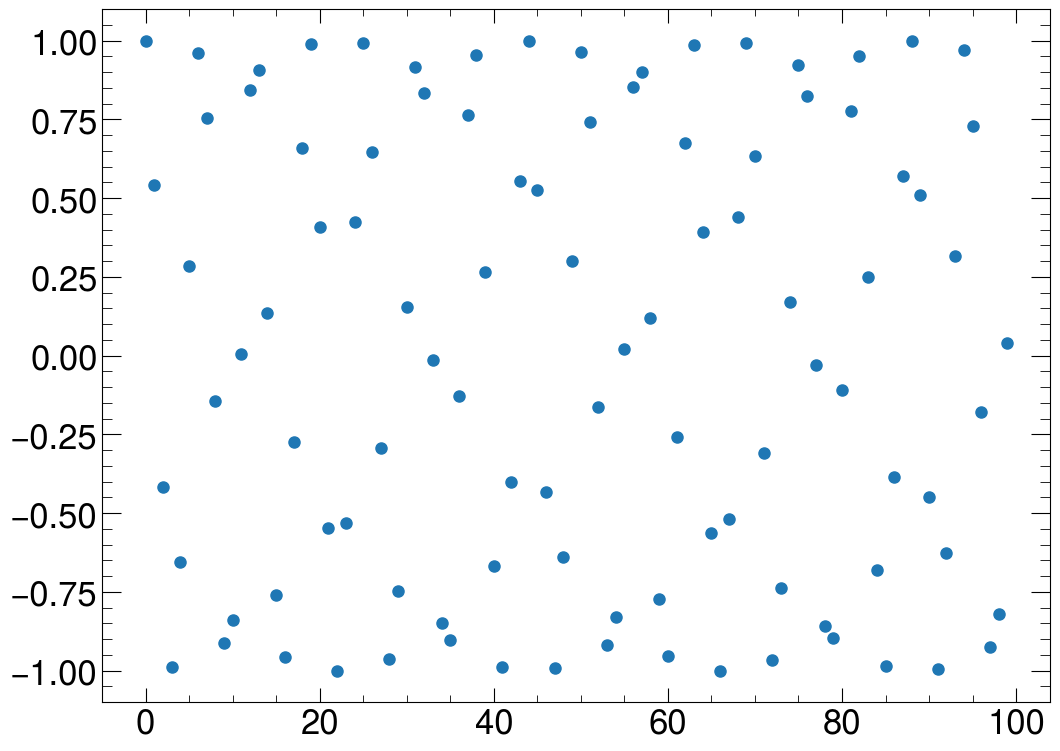

In [10]:
plt.scatter(new_df["x"], new_df["y"])